# SETTINGS AND RESEAU IMPORT

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
#Imports needed
import numpy as np #For everything                              version 
import matplotlib.pyplot as plt #For visualisation              version 
import networkx as nx #For the graph                            version 
from pickle import load as pload #For loading the gpickle file  version 
from PIL import Image #For image management                     version 
from tqdm import tqdm #For nice loading bars                    version 
from declaration_tutti import load, treat_a_new_reseau, load_from_scratch
from fct_utils import prune,xy2t
from fct_analyse import arbre_genealogique_branches,color_by_time
#Our part:
from Reseau import Reseau,Brindille,Branche 
from scipy.optimize import curve_fit
from IPython.display import Image
from  functions_avoidment import vision_des_branches_alice
import math 

reseau= load('M2WT_200616',"branched")
for b in reseau.branches:
        b.n2x = reseau.n2x
        b.n2y = reseau.n2y
        b.n2t = reseau.n2t


def tangent(node , branch): 
    nodi = branch.noeuds
    n2index = {n: i for i, n in enumerate(nodi)}
    index2n = {i: n for i, n in enumerate(nodi)}
    time_nodo = reseau.n2t[node]
    apex = node    
    try:
       pre_apex = branch.get_apex_at(time_nodo - 1)
    except ValueError:
        pre_apex = b.noeuds[0]
     
    direction = np.array([reseau.n2x[apex] - reseau.n2x[pre_apex],
                                  reseau.n2y[apex] - reseau.n2y[pre_apex]])
    norm =  np.linalg.norm(direction) 
    direction = direction / norm 
    theta = np.arctan2(direction[1], direction[0])
    direction_ort = np.array([direction[1], -direction[0]])
    return direction , direction_ort

def velocity ( branch, t):
    
    vel ,temps  = branch.positions_vitesses()[1] , branch.positions_vitesses()[2]
    t_index = np.where(temps == t)
    velocity = vel[t_index]
    
    return velocity 


dizionario={}
for  t in range(5, reseau.end +1 ,1):  #range from 1 to 55 
    dizionario[t] = {}
    isFree, obstacles , obstacles_branches ,closest_obstacles = vision_des_branches_alice(reseau, t = t , rayon = 62.5, demi_angle = 0.78 , show = False )
    
    for branch_index , values in closest_obstacles.items(): 
        dizionario[t][branch_index] = {}
        b = reseau.branches[branch_index]
        
        if b.ending == 'Fusion?': 
            fusion_node = b.noeuds[-1]
            obstacle = values['branch']
            nodi_obstacle = obstacle.noeuds
            if fusion_node in nodi_obstacle: # se finisci qui significa che b si fonderà sull'ostacolo 
                dizionario[t][branch_index]['fusione'] = 'si' 
        nodo = values['node'] 
        branch = values['branch'] 
        try : 
            tangente , normale  = tangent(nodo , branch) 
        except KeyError: continue
            
        velocità = velocity( b , t) 
        norm_vel = np.sqrt( (velocità[0][0])**2 + (velocità[0][1])**2 )
        v_parallel = np.dot( velocità , tangente ) #/ norm_vel
        '''
        if normale[0] * velocità[0][0] < 0: 
            u = velocità[0][0] 
            y = -u
            velocità[0][0] = y
            normale[0] = -normale[0] 
        '''
        v_perp = np.dot(velocità , normale)# /norm_vel
        dizionario[t][branch_index]['v_\\'] = float(v_parallel[0]) 
        dizionario[t][branch_index]['v_perp'] = float(v_perp[0])
        dizionario[t][branch_index]['obstacle'] = branch

dizionario_branches = {}
for t in dizionario.keys():
    for b , vel in dizionario[t].items(): 
     
        if b not in dizionario_branches.keys():
            dizionario_branches[b] = {} 
            dizionario_branches[b][t] = vel
        else: 
            dizionario_branches[b][t] = vel




# Extract distances for every time 

In [5]:
dizionario={}
for  t in range(5, reseau.end +1 ,1):  #range from 1 to 55 
    dizionario[t] = {}
    isFree, obstacles , obstacles_branches ,closest_obstacles = vision_des_branches_alice(reseau, t = t , rayon = 62.5, demi_angle = 0.78 , show = False )
    
    for branch_index , values in closest_obstacles.items(): 
        dizionario[t][branch_index] = {}
        b = reseau.branches[branch_index]
        
        if b.ending == 'Fusion?': 
            fusion_node = b.noeuds[-1]
            obstacle = values['branch']
            nodi_obstacle = obstacle.noeuds
            if fusion_node in nodi_obstacle: # se finisci qui significa che b si fonderà sull'ostacolo 
                dizionario[t][branch_index]['fusione'] = 'si' 
        nodo = values['node'] 
        branch = values['branch'] 
        try : 
            tangente , normale  = tangent(nodo , branch) 
        except KeyError: continue
        distance = values['distance']   
        velocità = velocity( b , t) 
        norm_vel = np.sqrt( (velocità[0][0])**2 + (velocità[0][1])**2 )
        v_parallel = np.dot( velocità , tangente ) #/ norm_vel
        '''
        if normale[0] * velocità[0][0] < 0: 
            u = velocità[0][0] 
            y = -u
            velocità[0][0] = y
            normale[0] = -normale[0] 
        '''
        v_perp = np.dot(velocità , normale)# /norm_vel
        dizionario[t][branch_index]['v_\\'] = float(v_parallel[0]) 
        dizionario[t][branch_index]['v_perp'] = float(v_perp[0])
        dizionario[t][branch_index]['obstacle'] = branch
        dizionario[t][branch_index]['distance'] = distance 

dizionario_branches = {}
for t in dizionario.keys():
    for b , vel in dizionario[t].items(): 
     
        if b not in dizionario_branches.keys():
            dizionario_branches[b] = {} 
            dizionario_branches[b][t] = vel
        else: 
            dizionario_branches[b][t] = vel


I have a dictionary made as follows: 
The external keys are the angle deviations of velocity I'm considering. The inner keys are the branches and the inner inner keys are the times at which they see the obstacle ( for 3 or more frames ), and the components of the speed WRT that obstacle in that time. 

In [18]:
a = 0
for b in selected_items[0.7853981633974483].keys():
    for t in list(selected_items[0.7853981633974483][b].keys()):
        a += 1
print(a)

336


In [19]:
distanze = {}
for angle , dict in selected_items.items():
    distanze[angle] = []
    for b in dict.keys(): 
        for t in dict[b].keys():
            branches = dizionario[t].keys()
            for branche in branches: 
                temp = [] 
                new_obstacle = dizionario[t][b]['obstacle']
                if temp != []:
                    if new_obstacle != old_obstacle:
                        distanze[angle].append(min(temp))
                        temp = []
                    
                distanza = dizionario[t][b]['distance']
                temp.append(distanza)
                old_obstacle == dizionario[t][b]['obstacle']
                 
            distanze[angle].append(min(temp))

# PLOT HISTOGRAMS 

# separating distances of the fuision from not fusion 

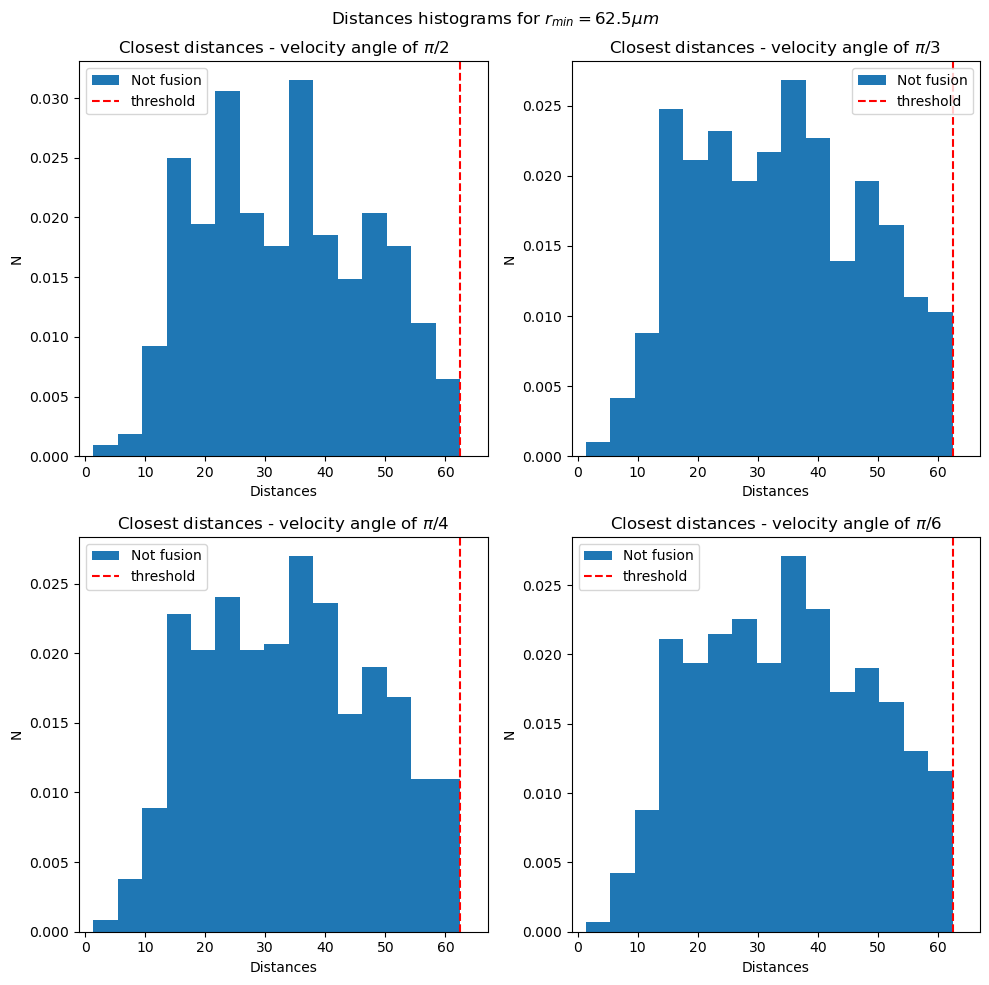

In [33]:
distanze = {}
distanze_fus = {}
v_perp = {}
v_par = {}
for angle , dict in selected_items.items():
    distanze[angle] = []
    distanze_fus[angle] = []
    v_perp[angle] = []
    v_par[angle] = []
    for b in dict.keys(): 
        for t in dict[b].keys():
            branches = dizionario[t].keys()    
            for branche in branches:
                temp = [] 
                v_temp = []
                new_obstacle = dizionario[t][b]['obstacle']
                if temp != []:
                    if new_obstacle != old_obstacle:
                        distanze[angle].append(min(temp))
                        temp = []
                    
                distanza = dizionario[t][b]['distance']
                old_obstacle == dizionario[t][b]['obstacle']
                temp.append(distanza)
                v_temp.append(dizionario[t][b]['v_perp'])
                              
            if 'fusione' in dizionario[t][b]:
                distanze_fus[angle].append(min(temp))

            if 'fusione' not in dizionario[t][b]:
                i = temp.index(min(temp))
                v_perp[angle].append(v_temp[i])
                distanze[angle].append(min(temp))



fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
fig.suptitle('Distances histograms for $r_{min} = 62.5 \mu m$')
for idx, angle in enumerate(selected_items.keys()):
    ax = axes[idx]
    ax.hist(distanze[angle], bins=15, density=True , label = 'Not fusion')
    #ax.hist(distanze_fus[angle], bins= 15 , alpha=0.4, label='fusion', density=True)
    
    ax.set_title(f'Closest distances - velocity angle of {angles[idx]}')
    ax.set_xlabel('Distances')
    ax.set_ylabel('N')
    ax.axvline(x=62.5, color='red', linestyle='--', label='threshold')
    ax.legend()
    ax.set_xlim(-0.99, 67)
for i in range(len(selected_items), 4):                                                 
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()           

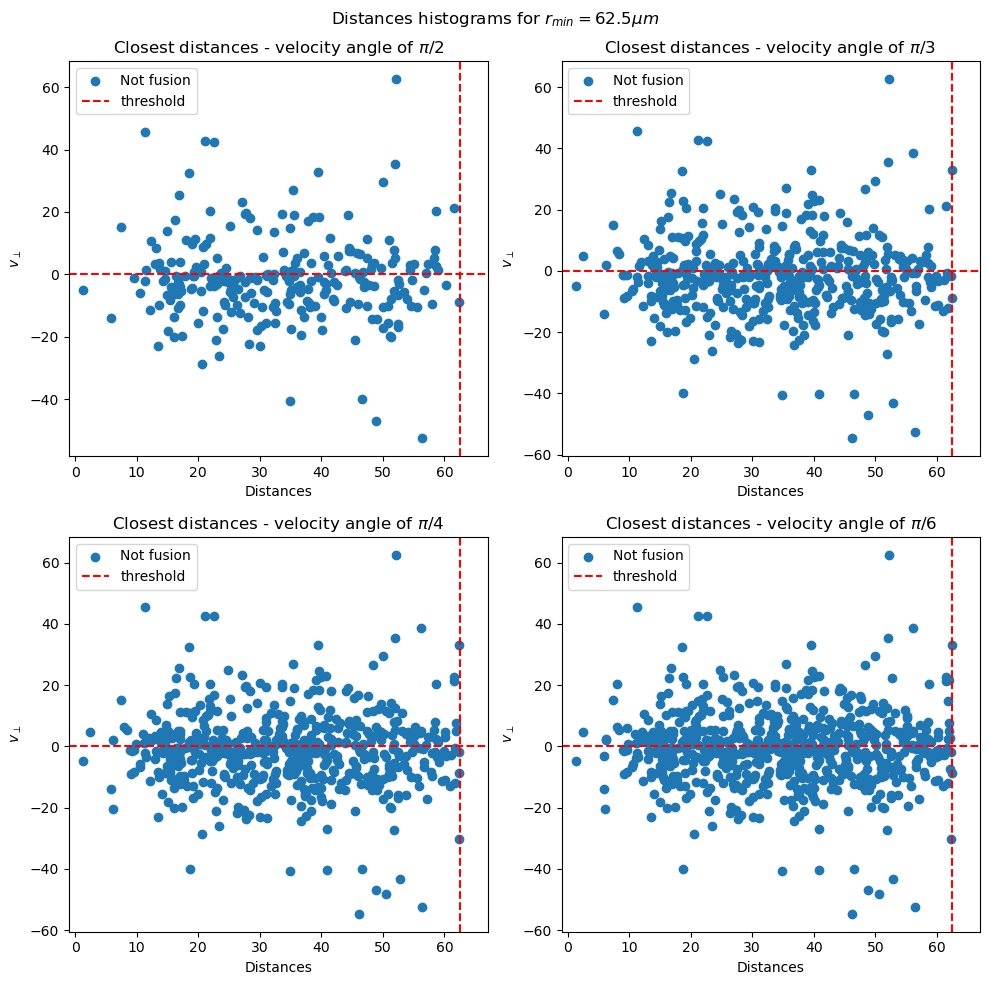

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
fig.suptitle('Distances histograms for $r_{min} = 62.5 \mu m$')
for idx, angle in enumerate(selected_items.keys()):
    ax = axes[idx]
    ax.scatter(distanze[angle] , v_perp[angle], label = 'Not fusion')
    ax.set_title(f'Closest distances - velocity angle of {angles[idx]}')
    ax.set_xlabel('Distances')
    ax.set_ylabel('$v_{\perp}$')
    ax.axvline(x=62.5, color='red', linestyle='--', label='threshold')
    ax.axhline(0, color='red', linestyle='--')
    ax.legend()
    
    ax.set_xlim(-0.99, 67)
for i in range(len(selected_items), 4):                                                 
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()           

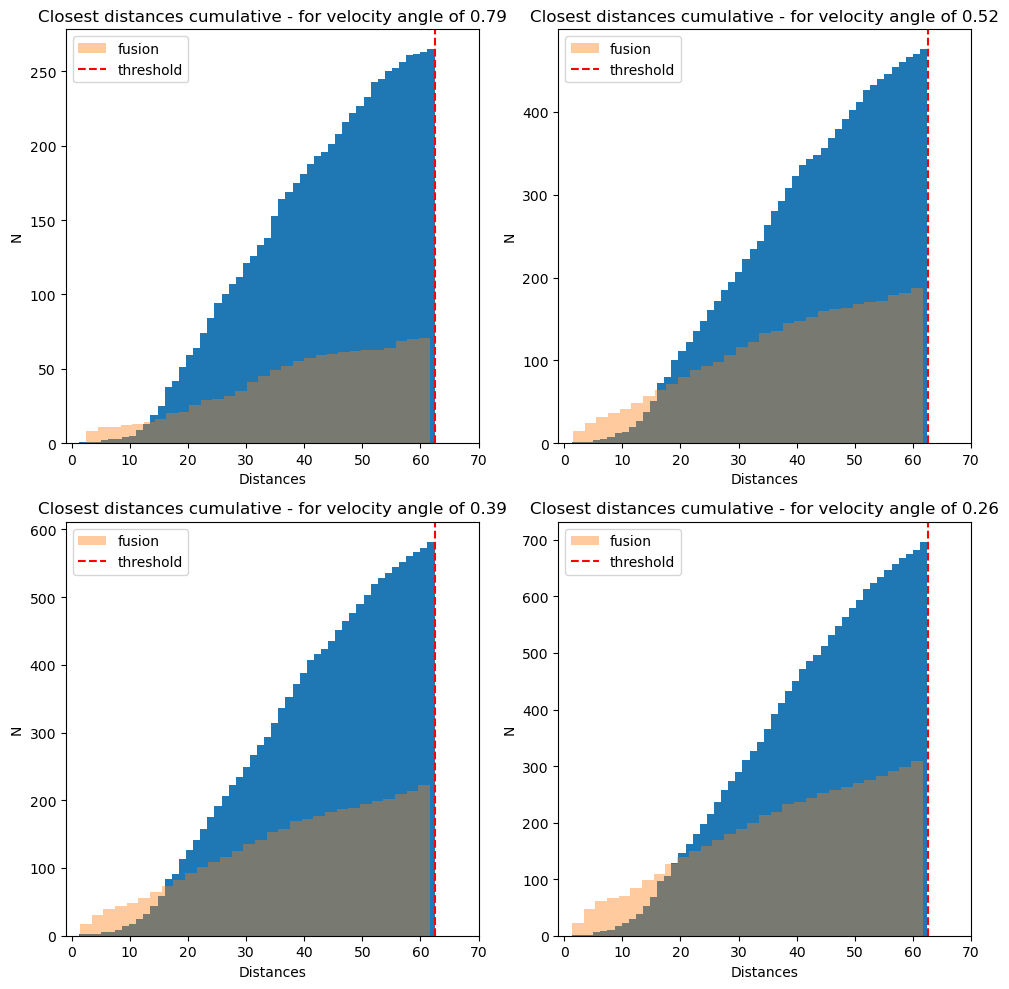

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for idx, angle in enumerate(selected_items.keys()):
    ax = axes[idx]
    ax.hist(distanze[angle], bins=50, cumulative=True)
    ax.hist(distanze_fus[angle], bins=30, alpha=0.4, label='fusion', cumulative=True)    
    
    ax.set_title(f'Closest distances cumulative - for velocity angle of {angle:.2f}')
    ax.set_xlabel('Distances')
    ax.set_ylabel('N')
    ax.axvline(x=62.5, color='red', linestyle='--', label='threshold')
    ax.legend()
    ax.set_xlim(-0.99, 70)
for i in range(len(selected_items), 4):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
